<a href="https://colab.research.google.com/github/Abie-UTB/Draining-a-Water-Tank-using-Numerical-Solution---A-Comparative-Study/blob/main/Onestep_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

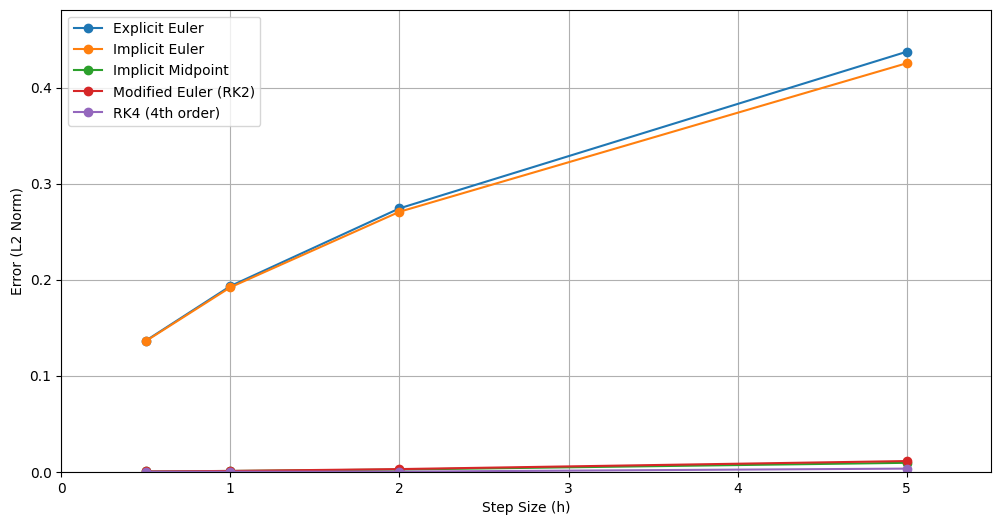

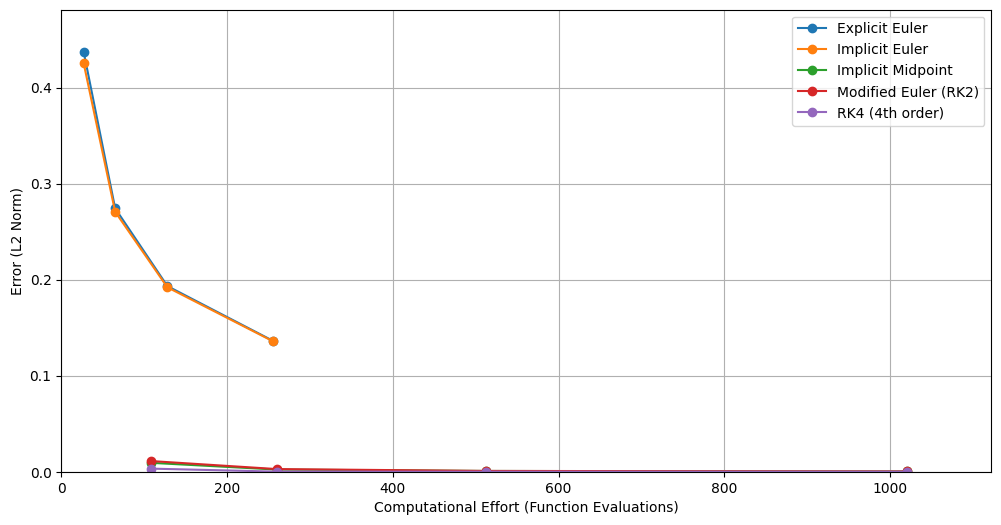

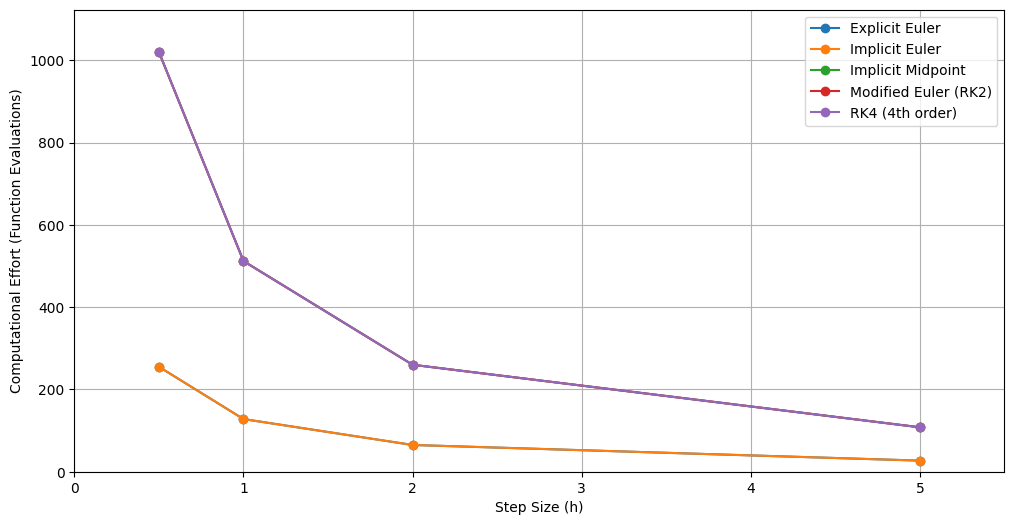

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the water drainage problem
g = 9.81  # Gravitational acceleration
D = 2     # Diameter of the cylinder
d = 0.2   # Diameter of the small hole at the bottom of the cylinder
initial_level = 8  # Initial water level in the tank
tend = 127  # End time

# Function to be solved (Torricelli's law)
def y_dot(t, y):
    return -np.sqrt(2 * g) * (d / D)**2 * np.sqrt(max(y, 0))  # Ensure non-negative y

# Exact solution
def exact_solution(t):
    return np.maximum((initial_level**0.5 - 0.5 * np.sqrt(2 * g) * (d / D)**2 * t)**2, 0)

# Numerical Methods
def explicit_euler(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        y_next = y[-1] + h * f(t[i], y[-1])
        y.append(max(y_next, 0))
    return np.array(y)

def implicit_euler(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        y_next = y[-1]
        for _ in range(10):  # Fixed-point iteration
            y_next = y[-1] + h * f(t[i + 1], y_next)
            y_next = max(y_next, 0)
        y.append(y_next)
    return np.array(y)

def implicit_midpoint(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        y_next = y[-1]
        for _ in range(10):  # Fixed-point iteration
            midpoint_time = (t[i] + t[i + 1]) / 2
            y_midpoint = (y[-1] + y_next) / 2
            y_next = y[-1] + h * f(midpoint_time, y_midpoint)
            y_next = max(y_next, 0)
        y.append(y_next)
    return np.array(y)

def runge_kutta_2(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        k1 = f(t[i], y[-1])
        k2 = f(t[i] + h / 2, y[-1] + h / 2 * k1)
        y_next = y[-1] + h * k2
        y.append(max(y_next, 0))
    return np.array(y)

def runge_kutta_4(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        k1 = f(t[i], y[-1])
        k2 = f(t[i] + h / 2, y[-1] + h / 2 * k1)
        k3 = f(t[i] + h / 2, y[-1] + h / 2 * k2)
        k4 = f(t[i] + h, y[-1] + h * k3)
        y_next = y[-1] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y.append(max(y_next, 0))
    return np.array(y)

# Define step sizes and methods
step_sizes = [0.5, 1.0, 2.0, 5.0]
methods = {
    "Explicit Euler": explicit_euler,
    "Implicit Euler": implicit_euler,
    "Implicit Midpoint": implicit_midpoint,
    "Modified Euler (RK2)": runge_kutta_2,
    "RK4 (4th order)": runge_kutta_4,
}

# Compute errors, computational effort, and other metrics
errors = {method: [] for method in methods}
efforts = {method: [] for method in methods}

for h in step_sizes:
    t = np.arange(0, tend + h, h)
    exact = exact_solution(t)
    for method, func in methods.items():
        y_approx = func(y_dot, initial_level, t, h)
        error = np.linalg.norm(exact - y_approx, ord=2)  # L2 norm
        nf = len(t) * (1 if method in ["Explicit Euler", "Implicit Euler"] else
                       (2 if method == "RK2 (2nd order)" else 4))  # Function evaluations
        errors[method].append(error)
        efforts[method].append(nf)

# Plotting Error vs Step Size
plt.figure(figsize=(12, 6))
for method, error_values in errors.items():
    plt.plot(step_sizes, error_values, label=method, marker='o')
plt.xlabel("Step Size (h)")
plt.ylabel("Error (L2 Norm)")
#plt.title("Error vs Step Size")
plt.legend()
plt.grid()
plt.xlim(0, max(step_sizes) * 1.1)  # Ensure x-axis starts at 0
plt.ylim(0, min(0.9 * min(min(errors[method]) for method in methods), 1) +
         max(max(errors[method]) for method in methods) * 1.1)
plt.show()

# Plotting Error vs Computational Effort
plt.figure(figsize=(12, 6))
for method, error_values in errors.items():
    plt.plot(efforts[method], error_values, label=method, marker='o')
plt.xlabel("Computational Effort (Function Evaluations)")
plt.ylabel("Error (L2 Norm)")
#plt.title("Error vs Computational Effort")
plt.legend()
plt.grid()
plt.xlim(0, max(max(efforts[method]) for method in methods) * 1.1)
plt.ylim(0, min(0.9 * min(min(errors[method]) for method in methods), 1) +
         max(max(errors[method]) for method in methods) * 1.1)
plt.show()

# Plotting Computational Effort vs Step Size
plt.figure(figsize=(12, 6))
for method, effort_values in efforts.items():
    plt.plot(step_sizes, effort_values, label=method, marker='o')
plt.xlabel("Step Size (h)")
plt.ylabel("Computational Effort (Function Evaluations)")
#plt.title("Computational Effort vs Step Size")
plt.legend()
plt.grid()
plt.xlim(0, max(step_sizes) * 1.1)
plt.ylim(0, min(0.9 * min(min(efforts[method]) for method in methods), 1) +
         max(max(efforts[method]) for method in methods) * 1.1)
plt.show()
